### Step 1: Data Overview

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './datasets/train.csv'
data = pd.read_csv(file_path)

# Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

The dataset contains the following columns:

UNIQUEID: Unique identifier for each loan application.
DISBURSED_AMOUNT: The amount disbursed for the loan.
ASSET_COST: Cost of the asset for which the loan is taken.
LTV: Loan to Value ratio.
BRANCH_ID: Identifier for the branch.
SUPPLIER_ID: Identifier for the supplier.
MANUFACTURER_ID: Identifier for the manufacturer.
CURRENT_PINCODE_ID: Pincode of the current location.
DATE_OF_BIRTH: Applicant's date of birth.
EMPLOYMENT_TYPE: Type of employment (Salaried, Self employed).
DISBURSAL_DATE: Date when the loan was disbursed.
STATE_ID: Identifier for the state.
EMPLOYEE_CODE_ID: Identifier for the employee processing the loan.
MOBILENO_AVL_FLAG: Availability of mobile number (1: Yes, 0: No).
AADHAR_FLAG: Availability of Aadhar (1: Yes, 0: No).
PAN_FLAG: Availability of PAN (1: Yes, 0: No).
VOTERID_FLAG: Availability of Voter ID (1: Yes, 0: No).
DRIVING_FLAG: Availability of Driving License (1: Yes, 0: No).
PASSPORT_FLAG: Availability of Passport (1: Yes, 0: No).
PERFORM_CNS_SCORE: Credit score from the Centralized Nervous System.
PERFORM_CNS_SCORE_DESCRIPTION: Description of the CNS score.
PRI_NO_OF_ACCTS: Number of primary accounts.
PRI_ACTIVE_ACCTS: Number of active primary accounts.
PRI_OVERDUE_ACCTS: Number of overdue primary accounts.
PRI_CURRENT_BALANCE: Current balance in primary accounts.
PRI_SANCTIONED_AMOUNT: Sanctioned amount for primary accounts.
PRI_DISBURSED_AMOUNT: Disbursed amount for primary accounts.
SEC_NO_OF_ACCTS: Number of secondary accounts.
SEC_ACTIVE_ACCTS: Number of active secondary accounts.
SEC_OVERDUE_ACCTS: Number of overdue secondary accounts.
SEC_CURRENT_BALANCE: Current balance in secondary accounts.
SEC_SANCTIONED_AMOUNT: Sanctioned amount for secondary accounts.
SEC_DISBURSED_AMOUNT: Disbursed amount for secondary accounts.
PRIMARY_INSTAL_AMT: Installment amount for primary accounts.
SEC_INSTAL_AMT: Installment amount for secondary accounts.
NEW_ACCTS_IN_LAST_SIX_MONTHS: Number of new accounts in the last six months.
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS: Number of delinquent accounts in the last six months.
AVERAGE_ACCT_AGE: Average age of accounts.
CREDIT_HISTORY_LENGTH: Length of credit history.
NO_OF_INQUIRIES: Number of inquiries made.
LOAN_DEFAULT: Indicator of loan default (1: Yes, 0: No).
Next, let's perform basic data cleaning by checking for missing values and handling them appropriately. We'll also look for outliers and handle them if necessary. Finally, we'll visualize the data to understand the distribution of different features.

Let's start with checking for missing values and their counts in each column. 

In [10]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying columns with missing values
missing_values[missing_values > 0]

EMPLOYMENT_TYPE    7661
dtype: int64

The EMPLOYMENT_TYPE column has 7,661 missing values. We need to handle these missing values appropriately. Common approaches include filling them with a placeholder, the mode, or dropping the rows with missing values.

Next, let's examine the summary statistics of the numeric columns to check for potential outliers.

In [11]:
# Displaying summary statistics for numeric columns
summary_stats = data.describe()
summary_stats

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


The summary statistics reveal some potential outliers in various columns, particularly:

DISBURSED_AMOUNT and ASSET_COST have high maximum values relative to their means and medians.
LTV (Loan to Value ratio) appears reasonable, with a range from 10.03 to 95.
SEC_CURRENT_BALANCE, SEC_SANCTIONED_AMOUNT, SEC_DISBURSED_AMOUNT, PRIMARY_INSTAL_AMT, and SEC_INSTAL_AMT have extreme values, indicating potential outliers.
NEW_ACCTS_IN_LAST_SIX_MONTHS, DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, and NO_OF_INQUIRIES also show high maximum values.
To handle these, we will use the Interquartile Range (IQR) method to detect and treat outliers. Additionally, for missing values in EMPLOYMENT_TYPE, we will fill them with the mode of the column since it is a categorical variable.

Steps:
Handle missing values in EMPLOYMENT_TYPE.
Detect and treat outliers using the IQR method.
Visualize the data to understand the distribution of different features.
Let's start with handling the missing values in EMPLOYMENT_TYPE

In [12]:
# Filling missing values in EMPLOYMENT_TYPE with the mode
employment_type_mode = data['EMPLOYMENT_TYPE'].mode()[0]
data['EMPLOYMENT_TYPE'].fillna(employment_type_mode, inplace=True)

# Verifying that there are no missing values left
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]

Series([], dtype: int64)

All missing values in the EMPLOYMENT_TYPE column have been filled. Next, let's detect and treat outliers using the IQR method for the relevant numerical columns.

We'll handle outliers for the following columns based on their summary statistics:

DISBURSED_AMOUNT
ASSET_COST
SEC_CURRENT_BALANCE
SEC_SANCTIONED_AMOUNT
SEC_DISBURSED_AMOUNT
PRIMARY_INSTAL_AMT
SEC_INSTAL_AMT
NEW_ACCTS_IN_LAST_SIX_MONTHS
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
NO_OF_INQUIRIES
We will define a function to detect and cap outliers using the IQR method.

In [13]:
def cap_outliers(df, column):
    """Cap outliers in a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# List of columns to cap outliers
columns_to_cap = [
    'DISBURSED_AMOUNT', 'ASSET_COST', 'SEC_CURRENT_BALANCE', 
    'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 
    'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES'
]

# Cap outliers for each specified column
for column in columns_to_cap:
    cap_outliers(data, column)

# Display summary statistics again to check the effect of outlier capping
summary_stats_after_capping = data.describe()
summary_stats_after_capping


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.0,233154.0,233154.0,233154.000000,233154.0,233154.0,233154.0,233154.0,233154.000000
mean,535917.573376,54009.109018,73953.640583,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,0.0,0.0,0.0,1190.589889,0.0,0.0,0.0,0.0,0.217071
std,68315.693711,11243.021581,12522.676947,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,0.0,0.0,0.0,1949.628583,0.0,0.0,0.0,0.0,0.412252
min,417428.000000,27243.000000,45489.875000,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,476786.250000,47145.000000,65717.000000,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,535978.500000,53803.000000,70946.000000,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,595039.750000,60413.000000,79201.750000,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.0,0.0,0.0,1999.000000,0.0,0.0,0.0,0.0,0.000000
max,671084.000000,80315.000000,99428.875000,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,0.0,0.0,0.0,4997.500000,0.0,0.0,0.0,0.0,1.000000


In [14]:
#print the different values in the MOBILENO_AVL_FLAG column
print(data['MOBILENO_AVL_FLAG'].value_counts())

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64


The outlier capping has adjusted the distributions of the relevant columns, making the statistics more reasonable. For example, the maximum values for columns such as DISBURSED_AMOUNT, ASSET_COST, PRIMARY_INSTAL_AMT, etc., are now much closer to the upper quartiles.

Next, let's visualize the data to understand the distribution of different features. We'll start with a few key columns, including:

DISBURSED_AMOUNT
ASSET_COST
LTV
EMPLOYMENT_TYPE
LOAN_DEFAULT
We'll create histograms for the numeric features and bar plots for the categorical feature (EMPLOYMENT_TYPE).

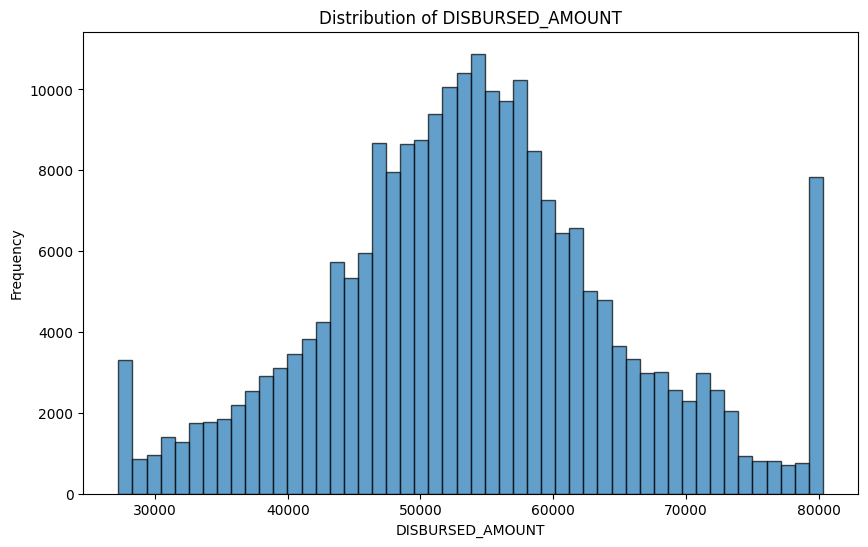

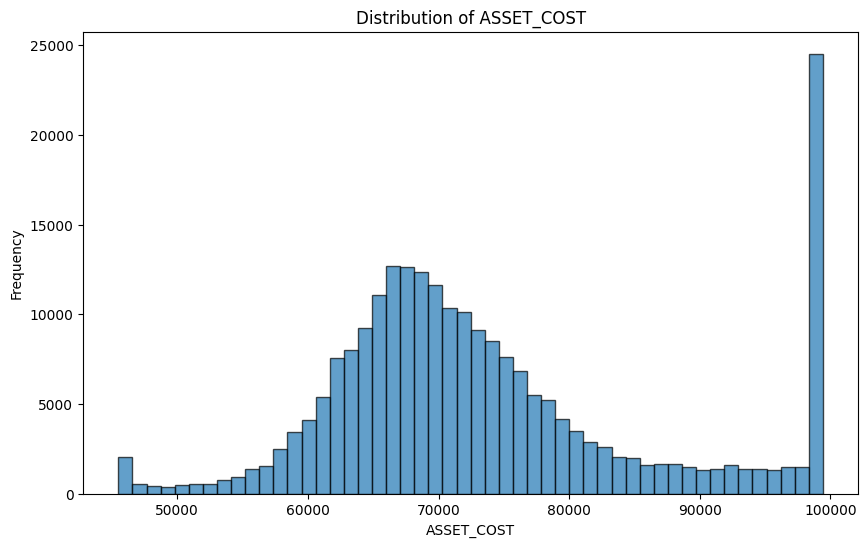

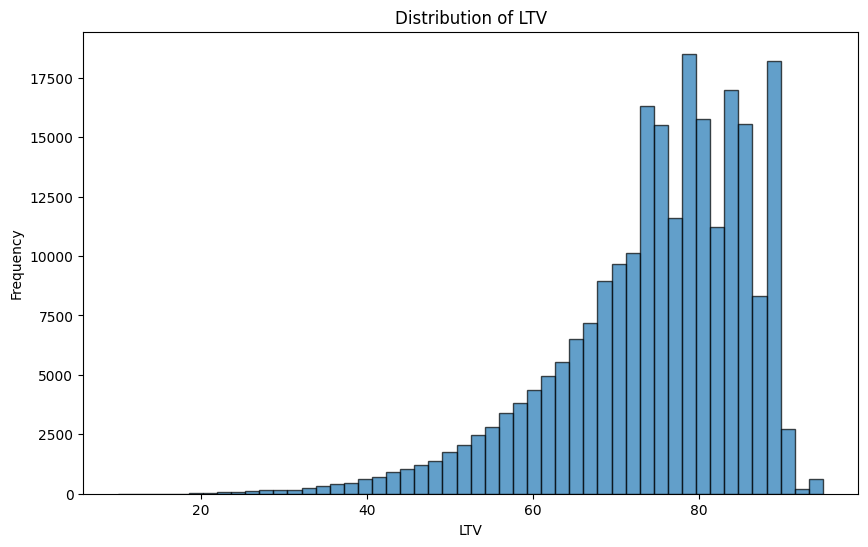

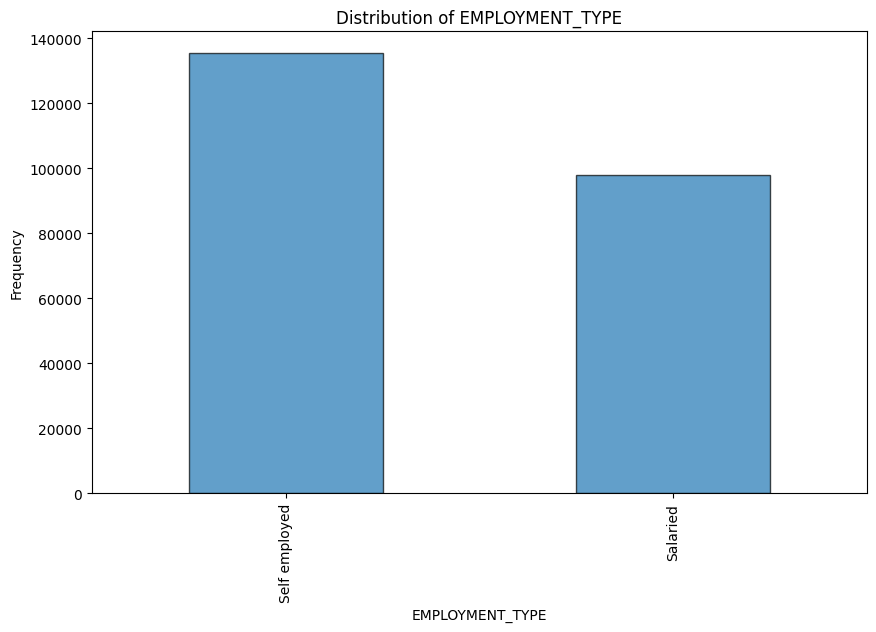

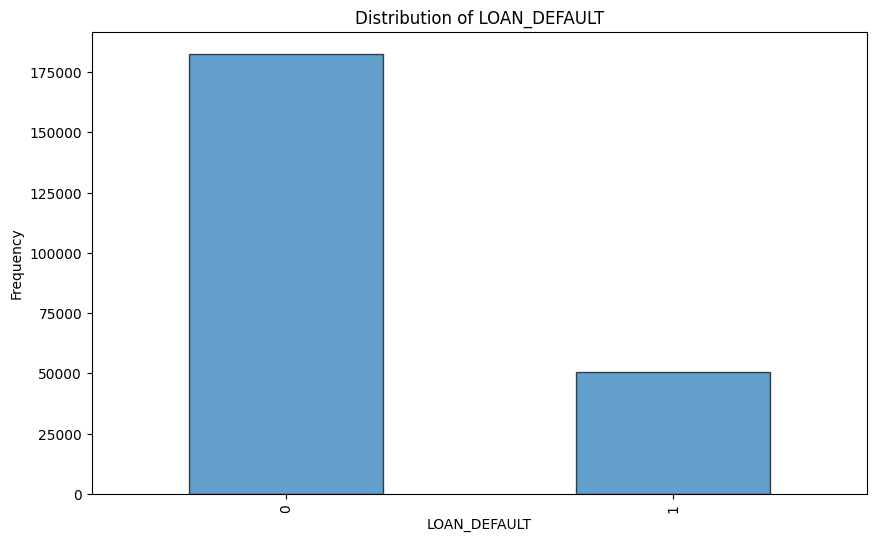

In [15]:
import matplotlib.pyplot as plt

# Function to plot histograms for numeric columns
def plot_histogram(df, column, bins=50):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to plot bar plot for categorical columns
def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plotting histograms for numeric columns
numeric_columns = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV']
for column in numeric_columns:
    plot_histogram(data, column)

# Plotting bar plot for the categorical column
plot_bar(data, 'EMPLOYMENT_TYPE')

# Plotting bar plot for the target column
plot_bar(data, 'LOAN_DEFAULT')

Here are the visualizations for the specified features:

DISBURSED_AMOUNT: The distribution is fairly concentrated with a peak around the mid-range values, showing a relatively normal distribution after outlier capping.
ASSET_COST: The asset cost distribution shows a concentration around mid-range values with a decline towards higher values, indicating a skew towards lower-cost assets.
LTV (Loan to Value ratio): The LTV distribution is concentrated towards the higher end, reflecting common loan practices.
EMPLOYMENT_TYPE: Most applicants are "Self employed" followed by "Salaried".
LOAN_DEFAULT: Shows the distribution of loan defaults with a significant portion having no defaults.

In [16]:
# Calculating correlation matrix
correlation_matrix = data.corr()

# Displaying the correlation matrix
correlation_matrix

/var/folders/4c/1vrx3b7s1sv9rc7lr4b4f_xw0000gn/T/ipykernel_61518/1985466518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,1.000000,0.161146,0.189194,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,NaN,NaN,NaN,-0.014008,NaN,NaN,NaN,NaN,0.033848
DISBURSED_AMOUNT,0.161146,1.000000,0.697169,0.435580,0.016213,0.072571,0.113351,0.075269,-0.026535,0.006852,...,-0.008052,NaN,NaN,NaN,0.021998,NaN,NaN,NaN,NaN,0.088164
ASSET_COST,0.189194,0.697169,1.000000,-0.292934,0.007484,0.153426,0.041210,0.338885,-0.034429,-0.001667,...,-0.016577,NaN,NaN,NaN,-0.058620,NaN,NaN,NaN,NaN,0.017957
LTV,-0.030537,0.435580,-0.292934,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,NaN,NaN,NaN,0.097246,NaN,NaN,NaN,NaN,0.098208
BRANCH_ID,-0.004509,0.016213,0.007484,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,NaN,NaN,NaN,-0.018630,NaN,NaN,NaN,NaN,0.030193
SUPPLIER_ID,0.025747,0.072571,0.153426,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,NaN,NaN,NaN,-0.064825,NaN,NaN,NaN,NaN,0.027357
MANUFACTURER_ID,-0.021514,0.113351,0.041210,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,NaN,NaN,NaN,0.062588,NaN,NaN,NaN,NaN,-0.025039
CURRENT_PINCODE_ID,0.030500,0.075269,0.338885,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,NaN,NaN,NaN,-0.109564,NaN,NaN,NaN,NaN,0.028419
STATE_ID,-0.057734,-0.026535,-0.034429,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,NaN,NaN,NaN,-0.004965,NaN,NaN,NaN,NaN,0.048075
EMPLOYEE_CODE_ID,0.075983,0.006852,-0.001667,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,NaN,NaN,NaN,0.003281,NaN,NaN,NaN,NaN,0.020657


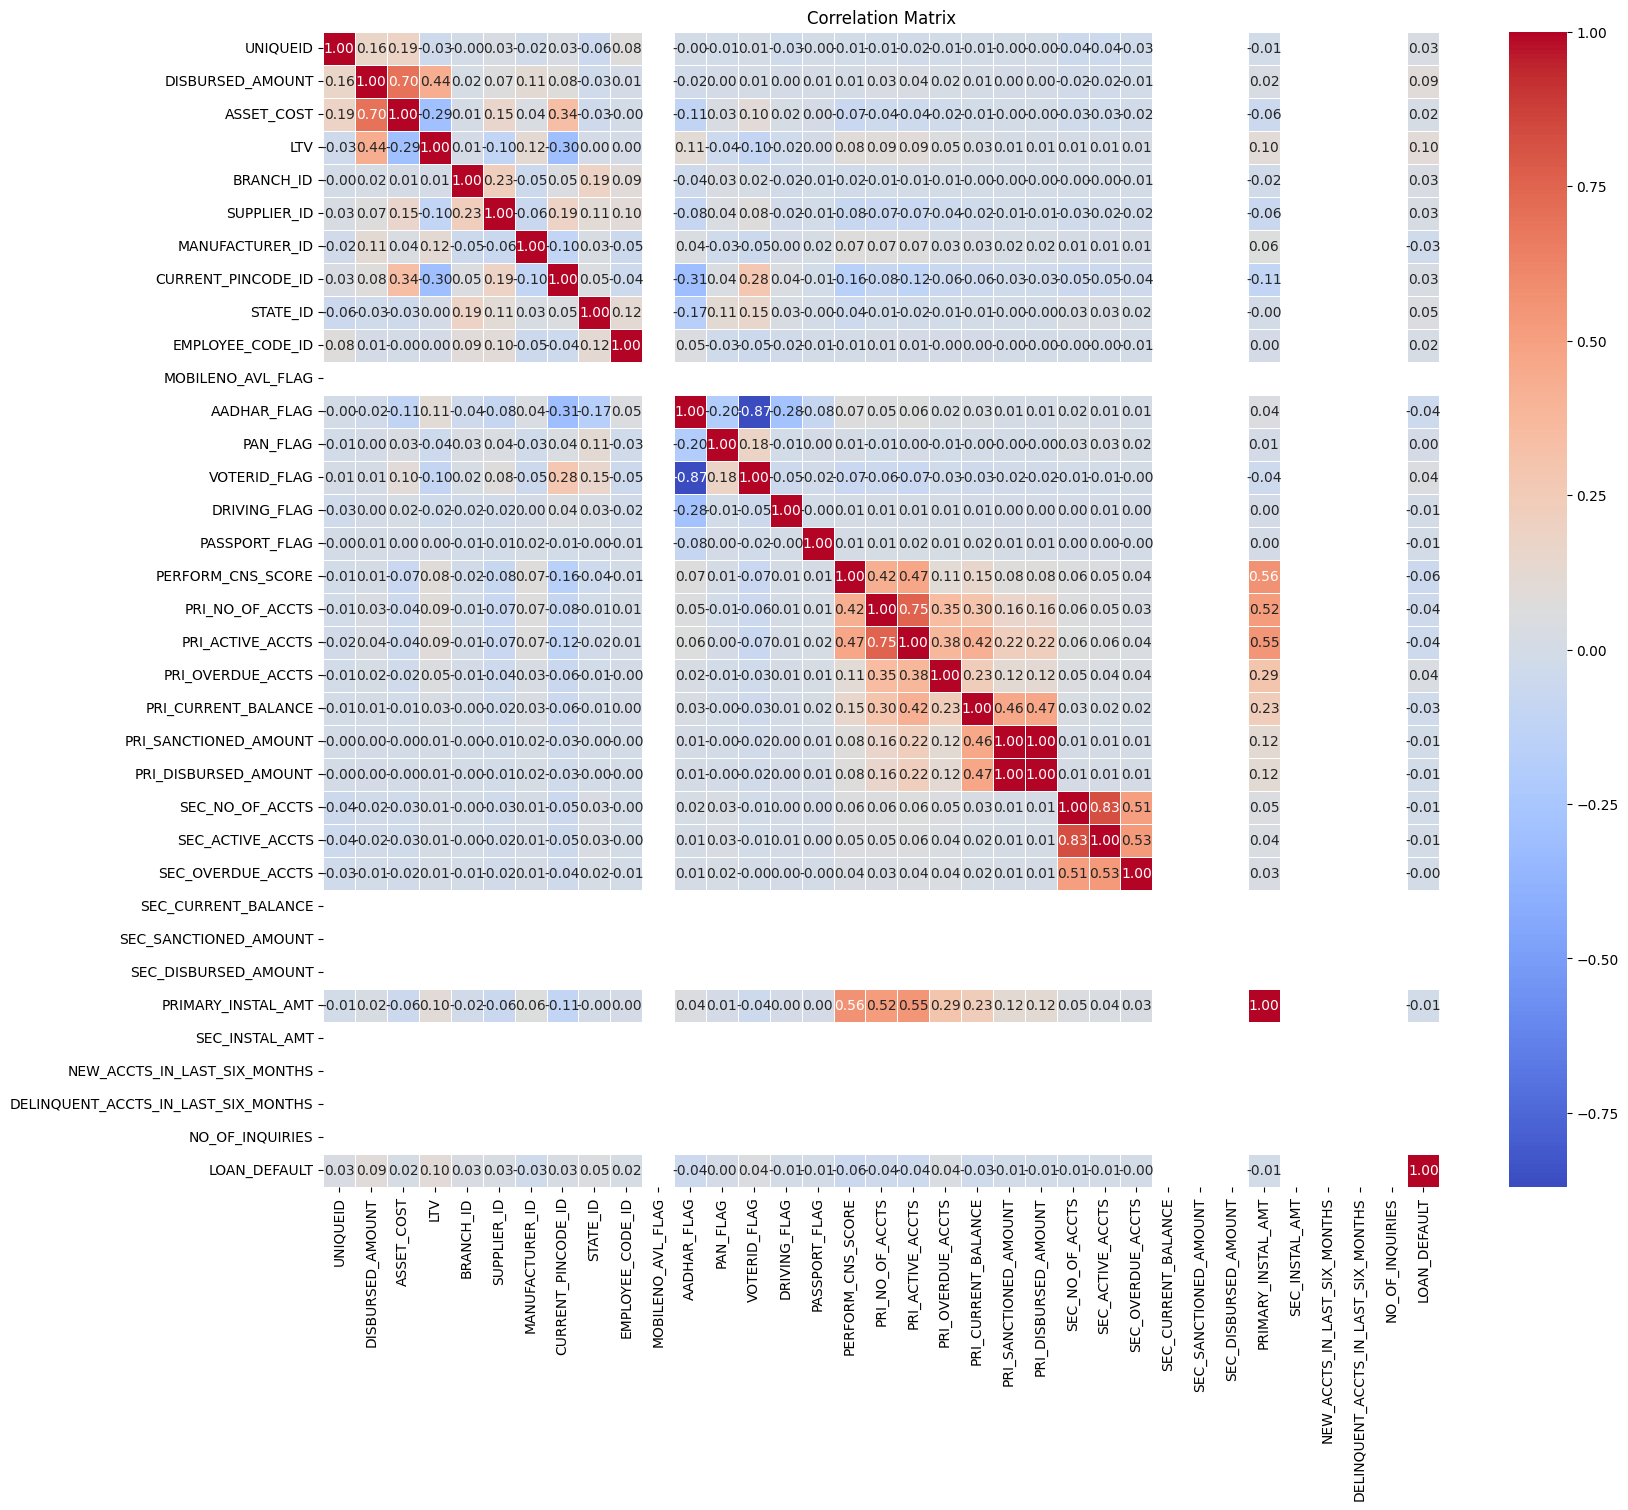

In [17]:
import seaborn as sns
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap shows the relationships between different features in the dataset. Key observations include:

Some features have moderate correlations with each other.
The LOAN_DEFAULT feature (our target variable) does not show strong correlations with most other features, indicating that no single feature strongly predicts loan defaults on its own.

To improve model performance and prediction accuracy, we can perform feature engineering by:

Selecting relevant features.
Creating new features where necessary.
Dropping or transforming less useful features.
Steps:
Convert DATE_OF_BIRTH to AGE: Drop DATE_OF_BIRTH after creating AGE.
Drop less informative features: Drop UNIQUEID, BRANCH_ID, SUPPLIER_ID, CURRENT_PINCODE_ID, EMPLOYEE_CODE_ID, STATE_ID, MOBILENO_AVL_FLAG, AADHAR_FLAG, PAN_FLAG, VOTERID_FLAG, DRIVING_FLAG, and PASSPORT_FLAG as they might not directly influence the prediction.
Convert categorical features to numerical: Encode EMPLOYMENT_TYPE and other categorical features if any.
Create new features: For example, converting the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH from strings to numerical values in months.
Let's start with converting DATE_OF_BIRTH to AGE and transforming AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH. Then, we will select relevant features and encode categorical features.

1. Convert DATE_OF_BIRTH to AGE:

In [18]:
from datetime import datetime

# Convert DATE_OF_BIRTH to AGE
current_year = datetime.now().year
data['DATE_OF_BIRTH'] = pd.to_datetime(data['DATE_OF_BIRTH'], format='%d-%m-%Y', errors='coerce')
data['AGE'] = current_year - data['DATE_OF_BIRTH'].dt.year

# Drop DATE_OF_BIRTH column
data.drop('DATE_OF_BIRTH', axis=1, inplace=True)

# Convert AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to numerical values in months
def convert_to_months(duration_str):
    if pd.isnull(duration_str):
        return 0
    years, months = 0, 0
    if 'yrs' in duration_str:
        years = int(duration_str.split('yrs')[0].strip())
        if 'mon' in duration_str:
            months = int(duration_str.split('yrs')[1].split('mon')[0].strip())
    elif 'mon' in duration_str:
        months = int(duration_str.split('mon')[0].strip())
    return years * 12 + months

data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].apply(convert_to_months)
data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].apply(convert_to_months)

# Display the first few rows to verify the transformations
data.head()


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE
0,420825,50578.0,58400.0,89.55,67,22807,45,1441,Salaried,03-08-2018,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,40
1,537409,47145.0,65550.0,73.23,67,22807,45,1502,Self employed,26-09-2018,...,0.0,1991.0,0.0,0.0,0.0,23,23,0.0,1,39
2,417566,53278.0,61360.0,89.63,67,22807,45,1497,Self employed,01-08-2018,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,39
3,624493,57513.0,66113.0,88.48,67,22807,45,1501,Self employed,26-10-2018,...,0.0,31.0,0.0,0.0,0.0,8,15,0.0,1,31
4,539055,52378.0,60300.0,88.39,67,22807,45,1495,Self employed,26-09-2018,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,47


The transformations have been applied successfully. Next, let's drop the less informative columns and encode the categorical EMPLOYMENT_TYPE feature.

2. Drop less informative features:
We'll drop columns that are unlikely to contribute significantly to the model's predictive power.

3. Encode categorical features:
We'll use one-hot encoding for the EMPLOYMENT_TYPE feature.

Let's proceed with these steps.

In [19]:
# Drop less informative columns
columns_to_drop = [
    'UNIQUEID', 'BRANCH_ID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 
    'EMPLOYEE_CODE_ID', 'STATE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 
    'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'DISBURSAL_DATE'
]

data.drop(columns_to_drop, axis=1, inplace=True)

# Encode the categorical feature EMPLOYMENT_TYPE using one-hot encoding
data = pd.get_dummies(data, columns=['EMPLOYMENT_TYPE'], drop_first=True)

# Encode the categorical feature PERFORM_CNS_SCORE_DESCRIPTION using one-hot encoding
data = pd.get_dummies(data, columns=['PERFORM_CNS_SCORE_DESCRIPTION'], drop_first=True)

# Display the first few rows to verify the changes
data.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,...,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,50578.0,58400.0,89.55,45,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,47145.0,65550.0,73.23,45,598,1,1,1,27600,50200,...,0,0,0,0,0,0,0,0,0,0
2,53278.0,61360.0,89.63,45,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,57513.0,66113.0,88.48,45,305,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,52378.0,60300.0,88.39,45,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The dataset has been transformed, and the necessary features have been created or removed. The relevant columns are now in a form suitable for modeling.

Summary of the steps performed:
Converted DATE_OF_BIRTH to AGE and dropped the original DATE_OF_BIRTH column.
Transformed AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to numerical values in months.
Dropped less informative columns.
Encoded the categorical EMPLOYMENT_TYPE feature using one-hot encoding.
Current Feature Set:
DISBURSED_AMOUNT
ASSET_COST
LTV
MANUFACTURER_ID
PERFORM_CNS_SCORE
PRI_NO_OF_ACCTS
PRI_ACTIVE_ACCTS
PRI_OVERDUE_ACCTS
PRI_CURRENT_BALANCE
PRI_SANCTIONED_AMOUNT
PRI_DISBURSED_AMOUNT
SEC_NO_OF_ACCTS
SEC_ACTIVE_ACCTS
SEC_OVERDUE_ACCTS
SEC_CURRENT_BALANCE
SEC_SANCTIONED_AMOUNT
SEC_DISBURSED_AMOUNT
PRIMARY_INSTAL_AMT
SEC_INSTAL_AMT
NEW_ACCTS_IN_LAST_SIX_MONTHS
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
AVERAGE_ACCT_AGE
CREDIT_HISTORY_LENGTH
NO_OF_INQUIRIES
AGE
EMPLOYMENT_TYPE_Self employed
LOAN_DEFAULT (target variable)

To build the models, we will:

Split the dataset into training and testing sets.
Apply Naive Bayes and SVM classifiers to the training data.
Tune the hyperparameters of the models to optimize performance.
Let's start with splitting the dataset.

Step 1: Split the dataset into training and testing sets
We will use a 70-30 split for training and testing.

Step 2: Apply Naive Bayes and SVM classifiers
We'll use Gaussian Naive Bayes and SVM with an RBF kernel initially.

Step 3: Tune the hyperparameters
We'll use GridSearchCV to tune the hyperparameters.

Let's start with these steps.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
#sCALE data, but only numerical columsn that are not binary
def is_binary(series):
    return series.nunique() == 2

data_scaled = data.copy()
for column in data.columns:
    if not is_binary(data[column]):
        scaler = StandardScaler()
        data_scaled[column] = scaler.fit_transform(data[[column]])

# Assuming 'data' is your dataframe
X = data_scaled.drop('LOAN_DEFAULT', axis=1)
y = data_scaled['LOAN_DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Applying Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluating Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Accuracy: 0.4343574420632765
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.35      0.49     54756
           1       0.24      0.75      0.37     15191

    accuracy                           0.43     69947
   macro avg       0.54      0.55      0.43     69947
weighted avg       0.71      0.43      0.46     69947



In [23]:
"""
from sklearn.svm import SVC

# Applying SVM classifier with initial hyperparameters
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)
"""
#TOO SLOW

'\nfrom sklearn.svm import SVC\n\n# Applying SVM classifier with initial hyperparameters\nsvm_model = SVC(kernel=\'rbf\', random_state=42)\nsvm_model.fit(X_train, y_train)\ny_pred_svm = svm_model.predict(X_test)\n\n# Evaluating SVM model\nsvm_accuracy = accuracy_score(y_test, y_pred_svm)\nsvm_report = classification_report(y_test, y_pred_svm)\n\nprint("SVM Accuracy:", svm_accuracy)\nprint("SVM Classification Report:\n", svm_report)\n'

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.7717843510086209
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     54756
           1       0.33      0.05      0.08     15191

    accuracy                           0.77     69947
   macro avg       0.56      0.51      0.48     69947
weighted avg       0.69      0.77      0.70     69947



In [46]:
"""
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
pipeline_optimizer.score(X_test, y_test)
pipeline_optimizer.export('tpot_exported_pipeline.py')
"""

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]